# Assignment 3 - Research Track 2

Second assignment for Research Track 2 course.
By **Miguel Angel Sempere Vicente (S5646720)**.

This Jupyter Notebook contains the third part of the continuous evaluation assignment. This task consists on performing a statistical analysis on the first assignment of Research Track 1, considering two different implementations (Miguel Angel Sempere and Kazuto Muto) and testing which one performs better, when silver and golden tokens are randomly placed in the environment.

## Hypotheses made

In hypothesis testing, we typically have a null hypothesis $H_0$ and an alternative hypothesis $H_a$. In this case, the null hypothesis assumes that there is no real difference in the average time it takes to finish the task when comparing both codes. The alternative hypothesis, on the other hand, suggests that there is a meaningful difference in the average time between the two groups. It can be stated as:


$H_0: μ_1 = μ_2$

$H_a: μ_1 ≠ μ_2$

Where $μ_1$ represents the population mean of the time needed for Miguel's code, and $μ_2$ represents the population mean of the time needed Kazuto's code.
## Experimental setup

The selected performance evaluator is the average time required to finish the task, with both codes having the same number of tokens (six). Incrementing the number of tokens and positioning them randomly in such an small environment could lead up to a situation where the robot would not finish the task as the tokens would block it's way.

### Time measurement

The code of the first assignment on Research Track 1 has been modified in order to add the timer and obtain the values that need to be evaluated.

```python
    # At the beginning
    start_timer = time.time()
    ...
    # When all the tokens are collected
    end_timer = time.time()
    print("Time: ", end_timer - start_timer)
```

### Token location

Following the guideline, the code `two_colours_assignment_arena.py` was modified in order to randomize the placement of the tokens in the environment. The line that sets the token (commented) has been replaced with a new one.

```python
    ...
    #token.location = (cos(angle) * radius, sin(angle) * radius)
    token.location = (random.uniform(-2.5,2.5), random.uniform(-2.5,2.5))
    ...
```

## Data collection and results

The tests was run 20 times for each code in order to get a sufficient amount of data to compensate the unfairness that may be caused by the random placement of tokens. All the values obtained are put in separate arrays in order to work with them easily.

In [1]:
%matplotlib inline

import math
import random
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from scipy.stats import norm


# Data obtained from running the tests
time_miguel = np.array([102.840250015, 103.225392818, 115.414563035, 106.207820892, 97.1259601116, 111.513813019, 115.292906046, 113.653072119, 98.9074220657, 90.302259922, 129.040606022, 118.453088045, 101.028284936, 112.616283715, 107.356695036, 99.542781002, 120.029747891, 93.609547951, 116.909824072, 109.215096914])
time_kazuto = np.array([127.794600964, 162.073622942, 135.443897009, 123.01842308, 149.255921841, 165.213048935, 101.214109898, 135.857527018, 100.754716158, 146.040688992, 149.958470106, 110.09246707, 141.641092919, 127.032416085, 154.663732007, 131.409566076, 147.627845109, 169.179850936, 124.437280918, 156.489669823])

# Means and standard deviation
miguel_mean = np.mean(time_miguel)
kazuto_mean = np.mean(time_kazuto)
means = [miguel_mean, kazuto_mean]

miguel_std = np.std(time_miguel)
kazuto_std = np.std(time_kazuto)
stds = [miguel_std, kazuto_std]


## Comparison

Bar graph with the comparison between Miguel's and Kazuto's codes.

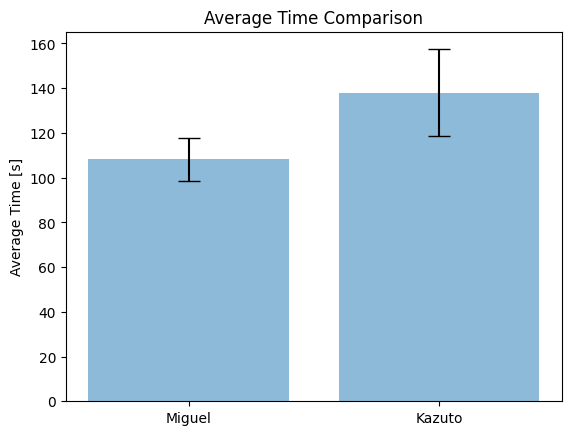

In [2]:
labels = ['Miguel', 'Kazuto']
x = np.arange(len(labels))
plt.ylabel('Average Time [s]')
plt.title('Average Time Comparison')
plt.xticks(x, labels)

plt.bar(x, means, alpha = 0.5, ecolor = 'black', yerr = stds, align = 'center', capsize = 8)

plt.show()


## Normality tests

To determine if the data is normally distributed, we can analyze the p-values obtained from the Shapiro-Wilk and Kolmogorov-Smirnov tests. Generally, if the p-value is greater than a predetermined significance level ($5\%$ in this case), we fail to reject the null hypothesis and consider the data to be normally distributed. On the other hand, if the p-value is less than the significance level, the null hypothesis is rejected and it is concluded that the sample is not normally distributed.

In [3]:
# Shapiro-Wilk test
shapiro_miguel_stat, shapiro_miguel_pvalue = stats.shapiro(time_miguel)
shapiro_kazuto_stat, shapiro_kazuto_pvalue = stats.shapiro(time_kazuto)

# Kolmogorov-Smirnov test
kstest_miguel_stat, kstest_miguel_pvalue = stats.kstest(time_miguel, 'norm')
kstest_kazuto_stat, kstest_kazuto_pvalue = stats.kstest(time_kazuto, 'norm')

print("Normality Test Results:")
print("----------------------------")
print(f"Miguel's sample: {'Normally distributed' if shapiro_miguel_pvalue > 0.05  else 'Not normally distributed'}")
print(f"Kazuto's sample: {'Normally distributed' if shapiro_kazuto_pvalue > 0.05  else 'Not normally distributed'}")


Normality Test Results:
----------------------------
Miguel's sample: Normally distributed
Kazuto's sample: Normally distributed


As the Kolmogorov-Smirnov test is returning a p-value of 0.0 for both sets of samples, it suggests that the test is unable to accurately compute the p-value for such a small value, and therefore it cannot provide conclusive evidence of normality. By using the Shapiro-Wilk test only, it can be conclude that the data is normally distributed for both codes, and it is possible to plot a histogram with a normal distribution curve on both cases.

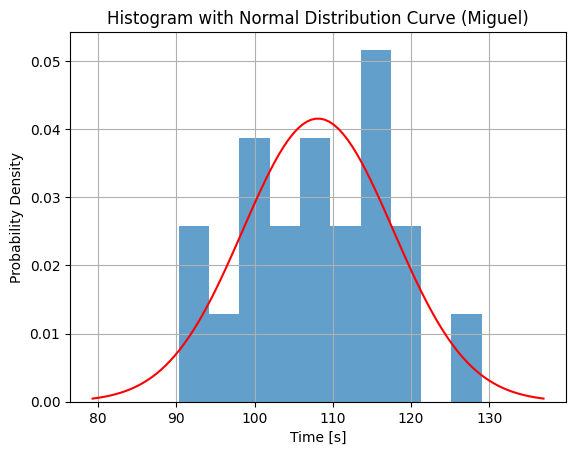

In [4]:
# Values for the normal distribution curve
x = np.linspace(miguel_mean - 3 * miguel_std, miguel_mean + 3 * miguel_std, 100)
y = norm.pdf(x, miguel_mean, miguel_std)

# Histogram
plt.hist(time_miguel, bins=10, density=True, alpha=0.7)

# Distribution curve
plt.plot(x, y, 'r')

plt.xlabel('Time [s]')
plt.ylabel('Probability Density')
plt.title('Histogram with Normal Distribution Curve (Miguel)')
plt.grid(True)

plt.show()


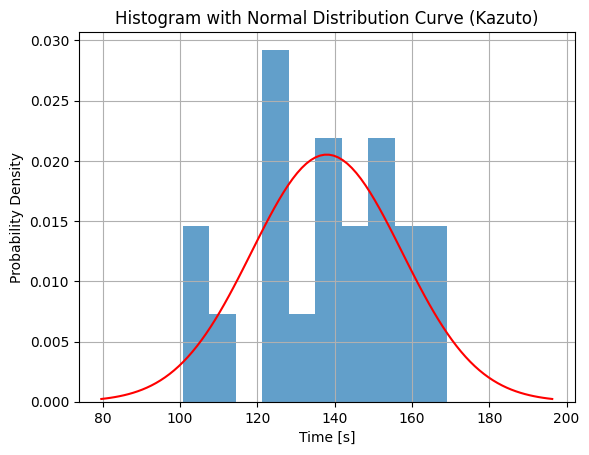

In [5]:
# Values for the normal distribution curve
x = np.linspace(kazuto_mean - 3 * kazuto_std, kazuto_mean + 3 * kazuto_std, 100)
y = norm.pdf(x, kazuto_mean, kazuto_std)

# Histogram
plt.hist(time_kazuto, bins=10, density=True, alpha=0.7)

# Normal distribution curve
plt.plot(x, y, 'r')

plt.xlabel('Time [s]')
plt.ylabel('Probability Density')
plt.title('Histogram with Normal Distribution Curve (Kazuto)')
plt.grid(True)

plt.show()


## Discussion with statistical analysis

The t-test is suitable when comparing the means of two groups in case of small samples and is commonly used when the population standard deviation is unknown, whilst the z-test assumes that you have access to the population standard deviation. In this case, the population standard deviation is not known, and we should rely on the sample standard deviation to estimate it. Therefore, the most appropriate test to compare the means of the two groups would be the t-test. However, as we have a pair of runs executed in the same environment, it's more indicated to use the paired t-test.

In conclusion, both the independent t-test and the paired t-test are going to be used to study the statistical performance of the two groups.






### T-Table

The t-table, also known as the t-distribution table, is a reference table that provides critical values for the t-distribution. It is used in hypothesis testing and confidence interval estimation when working with small sample sizes or when the population standard deviation is unknown. Given the fact that for a two sample t-test $DoF = N_a + N_b - 2$, and for paired t-test $DoF = N - 1$, for a significance = $5\%$ the values in bold are the ones that should be used as critical values. However, this value can also be computed as done in the code below.

| Two-sided |  50%  |  60%  |  70%  |  80%  |  90%  |  95%  |  98%  |  99%  |  99.5% | 99.8% |  99.9% |
|:---------:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:------:|:-----:|:------:|
| 18 | 0.688 | 0.862 | 1.067 | 1.330 | 1.734 | 2.101  | 2.552  | 2.878  | 3.197   | 3.610   | 3.922   |
| 19 | 0.688 | 0.861 | 1.066 | 1.328 | 1.729 | **2.093**  | 2.539  | 2.861  | 3.174   | 3.579   | 3.883   |
| 20 | 0.687 | 0.860 | 1.064 | 1.325 | 1.725 | 2.086  | 2.528  | 2.845  | 3.153   | 3.552   | 3.850   |
| 37 | 0.683 | 0.855 | 1.054 | 1.335 | 1.725 | 2.026  | 2.423  | 2.710  | 3.000   | 3.433   | 3.747   |
| 38 | 0.683 | 0.854 | 1.054 | 1.334 | 1.724 | **2.024**  | 2.420  | 2.706  | 2.995   | 3.426   | 3.738   |
| 39 | 0.683 | 0.854 | 1.053 | 1.333 | 1.722 | 2.023  | 2.418  | 2.704  | 2.992   | 3.420   | 3.730   |

### T-Test

In [6]:
# T-test
t_stat, p_value = stats.ttest_ind(time_miguel, time_kazuto)

# Degrees of freedom
sample_size = len(time_miguel) + len(time_kazuto)
df = sample_size - 2

# Significance level
alpha = 0.05

# Critical t-value
critical_value = 2.024 # From t-table
critical_value = stats.t.ppf(1 - alpha / 2, df) # Calculated

print("T-value:", t_stat)
print("P-value:", p_value)
print("DoF:", df)
print("Critical t-value:", critical_value)

if abs(t_stat) > critical_value:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

T-value: -5.999466943705173
P-value: 5.702340216452459e-07
DoF: 38
Critical t-value: 2.024394164575136
Reject the null hypothesis


### Paired T-Test

In [7]:
# Paired t-test
t_stat, p_value = stats.ttest_rel(time_miguel, time_kazuto)

# Degrees of freedom
df = len(time_miguel) - 1

# Significance level
alpha = 0.05

# Critical t-value
critical_value = 2.093 # From t-table
critical_value = stats.t.ppf(1 - alpha / 2, df) # Calculated

print("T-value:", t_stat)
print("P-value:", p_value)
print("DoF:", df)
print("Critical t-value:", critical_value)

if abs(t_stat) > critical_value:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


T-value: -5.614219304985197
P-value: 2.055166379996712e-05
DoF: 19
Critical t-value: 2.093024054408263
Reject the null hypothesis


## Conclusion

Both tests state that the null hypothesis should be rejected, therefore the alternative hypothesis should be embraced, concluding that there is a significant difference in the average time between the two groups. 

The sign of the t-value depends on the direction of the difference between the two sample means. In both tests, the t-value equals to negative 6 approximately, and so it can be concluded that Miguel's code is statistically performing better for the same task when compared to the Kazuto's script. As Miguel's code took less time to finish the task, the conclusion may have seem obvious only by looking at the bar graph comparing both samples, but it is important to run the tests because there may be other cases when the conclusion might not be as easy to obtain.